# Algoritma Pemrograman II
## Web Data Acquisition
-------------------------
Ridho Pandhu Afrianto

162112133062


# Nomor 1

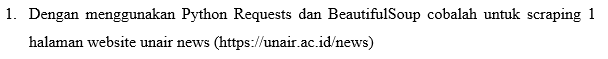

## Python Requests Method


In [ ]:
%pip install requests
import requests

In [ ]:
url = 'https://unair.ac.id/news'
response = requests.get(url)
response.text

## Beautiful Soup Method


In [ ]:
%pip install bs4
from bs4 import BeautifulSoup

In [ ]:
data = response.text 
soup = BeautifulSoup(data, 'html.parser')
soup

# Nomor 2

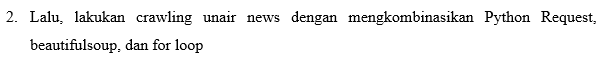

In [ ]:
from urllib.parse import urljoin

for link in soup.find_all('a'):
  raw = link.get("href")
  link = urljoin(url, raw)
  print(link)

# Nomor 3


In [ ]:
%pip install scrapy

In [7]:
import scrapy

class BasicftmmcatSpider(scrapy.Spider):
  name = 'basicftmmcat'

  start_urls = ["https://store.playstation.com/en-id"]

  def parse(self, response):
    for text in response.css('a'):
      yield{
          'title':text.css('a::text').get(),
          'link':tex.css('a::attr(href)').get()
      }

    next_page_selector = '.page-numbers.current + a:attr(href)'
    next_page = response.css(next_page_selector).extract_first()
    if next_page:
      yield scrapy.Request(
          response.urljoin(nextpage),
          callback=self.parse)
